<a href="https://colab.research.google.com/github/Gh6if84vi/DataScience-Learning-/blob/main/Numpy_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer this NoteBook after completing Numpy part1 NoteBook

# Numpy array vs Python Lists

In [64]:
#speed
# Using lists
a=[i for i in range(10000000)]
b=[i for i in range(10000000,20000000)]
c=[]
import time
start=time.time()
for  i in  range(len(a)):
  c.append(a[i]+b[i])
print(time.time()-start)

#using Numpy array
import numpy as np
c=np.arange(10000000)
d=np.arange(10000000,20000000)
start1=time.time()
e=a+b
print(time.time()-start1)


##The output shows how fast is Numpy array compared to Normal lists


9.18057656288147
0.48136305809020996


In [65]:
#Memory
a=[i for i in range(10000000)]
import sys
print(sys.getsizeof(a))
b=np.arange(10000000,dtype=np.int16)
print(sys.getsizeof(b))

89095160
20000112


In [66]:
#convenience
#Operations on numpy arrays are easier way when compared to python list

# **Advanced Indexing**

In [67]:
#Fancy Indexing-Things that normal indexing cannot do
a=np.arange(24).reshape(6,4)
print(f"Array is : \n{a} ")
print()
print(a[[0,2,3,5]])
print()
print(a[:,[0,2,3]])



Array is : 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]] 

[[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [20 21 22 23]]

[[ 0  2  3]
 [ 4  6  7]
 [ 8 10 11]
 [12 14 15]
 [16 18 19]
 [20 22 23]]


In [68]:
#boolean indexing
import numpy as np
a=np.random.randint(1,100,24).reshape(6,4)
a

array([[73, 83, 38, 71],
       [86, 40, 42, 73],
       [52, 67, 10, 61],
       [44, 17, 87, 97],
       [34, 74,  8, 32],
       [84, 20, 55, 75]])

In [69]:
#Find all numbers greater than 50
print(a[a>50])

[73 83 71 86 73 52 67 61 87 97 74 84 55 75]


In [70]:
#Find all numbers greater than 50 and even
print(a[(a>50) & (a%2==0)])

[86 52 74 84]


In [71]:
#Find all numbers not  divisible by 7
print(a[~(a%7==0)])

[73 83 38 71 86 40 73 52 67 10 61 44 17 87 97 34 74  8 32 20 55 75]


# **Broadcasting**

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations



In [72]:
#same size
a=np.arange(12).reshape(3,4)
b=np.arange(12,24).reshape(3,4)
print(a+b)

[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]


In [73]:
#diff. size
a=np.arange(12).reshape(3,4)
b=np.arange(12,24).reshape(4,3)
# print(a+b)
#

***Broadcasting rules***

1.**Make two arrays have the same no.of dimensions**

         .If the numbers of dimensions of two arrays are different,add new dimensions with size 1 to head of the array with smaller dimensions

         eg:(3,2) and (3,)---->(3,2) and (1,3)

         eg2:(3,3,3) and (3,)---->(3,3,3) and (1,1,3)

2.**Make each dimension of the two arrays the same size**

    .If the size of each dimesnion of the two arrays do not match,dimensions with size 1 are strectched to match other array

    >If there is a dimesnion whose size is not 1 in either of two arrays,it cannot be broadcaseted and error is raised

|

      

     

In [74]:
a=np.arange(3).reshape(1,3)
b=np.arange(3).reshape(3,1)
print(a+b)

#(1,3)-->(3,3) and (3,1)-->(3,3)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [75]:
#Eg 4:
a=np.arange(3).reshape(1,3)
b=np.arange(4).reshape(4,1)
print(a+b)

#(1,3)-->(4,3) and (4,1)-->(4,3)


[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [76]:
#Eg: 5
a=np.array([1])
#shape-->(1,1)
b=np.arange(4).reshape(2,2)
#shape-->(2,2)
print(a+b)

#Role of Broadcasting
#(1,)-->(1,1)-->(2,2) + (2,2)=(2,2)

[[1 2]
 [3 4]]


# Working with mathematical formulas

In [77]:
#sigmoid
def sigmoid(arr):
  return 1/(1+np.exp(-(arr)))
a=np.arange(12)
print(sigmoid(a))

[0.5        0.73105858 0.88079708 0.95257413 0.98201379 0.99330715
 0.99752738 0.99908895 0.99966465 0.99987661 0.9999546  0.9999833 ]


In [78]:
#mean squared error
actual=np.random.randint(1,50,25)
predicted=np.random.randint(1,50,25)
print(actual)
print(predicted)
def mse(actual,predicted):
  return np.mean((actual-predicted)**2)
print(mse(actual,predicted))




[ 7 16 48 22 44 46 43 20 30 40 15 10 43  1 32 38 21 47 39 25 29  2 34 39
 27]
[38 10 15  6 30 25 28 39 33 45 29 30 17 27  5 11 15 12 20 10 12 17 41 37
 48]
394.4


# Working with missing values

In [79]:
#working with  misiing values
a=np.array([1,2,np.nan,3,4,np.nan])
print(a)
print(np.isnan(a))
print(a[np.isnan(a)])
print(a[~np.isnan(a)])

[ 1.  2. nan  3.  4. nan]
[False False  True False False  True]
[nan nan]
[1. 2. 3. 4.]


# Plotting Graphs

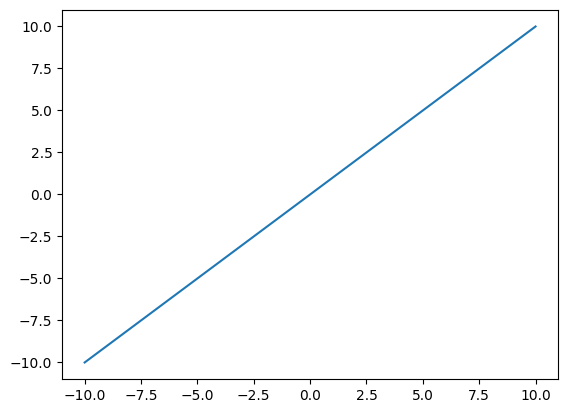

In [80]:
#plotting a 2D plot
#x=y(straight line passing through origin at 45degree)
x=np.linspace(-10,10,100)
y=x
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

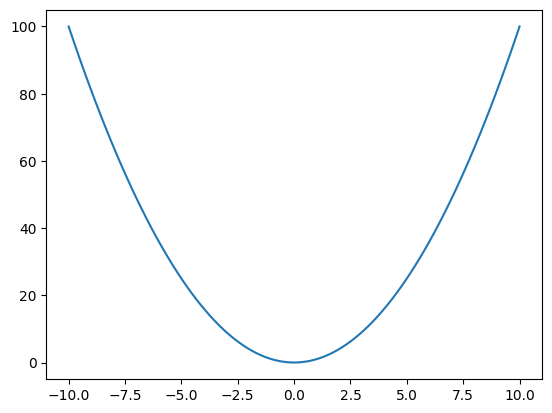

In [81]:
#parabola
x=np.linspace(-10,10,100)
y=x**2
plt.plot(x,y)
plt.show()

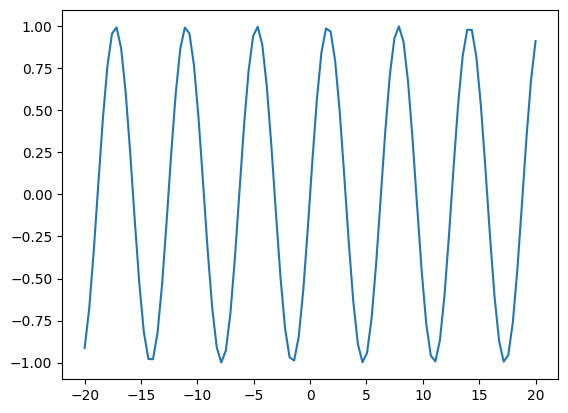

In [82]:
#sinx
x=np.linspace(-20,20,100)
y=np.sin(x)
plt.plot(x,y)
plt.show()

# **Numpy Tricks :)**

In [83]:
import numpy as np
a=np.random.randint(1,100,15)
print(a)

[53 83 83 32 44 76  9 69 56 83 50 22 46 19 74]


In [84]:
b=np.random.randint(1,100,24).reshape(6,4)
print(b)

[[28 99 91 61]
 [55 93 33 27]
 [14 82 38 30]
 [13 22 25 10]
 [22 38 83 10]
 [55 40 36 18]]


In [85]:
#sorting arrays
print(np.sort(a))



[ 9 19 22 32 44 46 50 53 56 69 74 76 83 83 83]


In [86]:
#for 2D
print(np.sort(b,axis=0))
print(np.sort(b,axis=1))

[[13 22 25 10]
 [14 38 33 10]
 [22 40 36 18]
 [28 82 38 27]
 [55 93 83 30]
 [55 99 91 61]]
[[28 61 91 99]
 [27 33 55 93]
 [14 30 38 82]
 [10 13 22 25]
 [10 22 38 83]
 [18 36 40 55]]


# np.append()
 The numpy.append() appends values along mentioned axis at the end of the array

In [87]:
print(np.append(a,200))
#For 2D
print(np.append(b,np.ones((b.shape[0],1)),axis=1))

[ 53  83  83  32  44  76   9  69  56  83  50  22  46  19  74 200]
[[28. 99. 91. 61.  1.]
 [55. 93. 33. 27.  1.]
 [14. 82. 38. 30.  1.]
 [13. 22. 25. 10.  1.]
 [22. 38. 83. 10.  1.]
 [55. 40. 36. 18.  1.]]


#np.concatenate()

this function concatenate a sequence of arrays along existing axis

In [88]:
c=np.arange(12).reshape(4,3)
d=np.arange(6,18).reshape(4,3)
print(f"c is :\n{c}")
print(f"d is :\n{d}")


c is :
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
d is :
[[ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]


In [89]:
print(np.concatenate((c,d),axis=0))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]


In [90]:
print(np.concatenate((c,d),axis=1))

[[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]
 [ 6  7  8 12 13 14]
 [ 9 10 11 15 16 17]]


In [91]:
print(np.concatenate((c,d,c,d),axis=1))

[[ 0  1  2  6  7  8  0  1  2  6  7  8]
 [ 3  4  5  9 10 11  3  4  5  9 10 11]
 [ 6  7  8 12 13 14  6  7  8 12 13 14]
 [ 9 10 11 15 16 17  9 10 11 15 16 17]]


# np.unique()

This function helps to get unique values from a given array

In [92]:
c=np.array([1,1,1,1,2,2,1,1,2,3,4,5,2,3,4,1,3,4,4,2,3,4,2,1,2,3,2,3,])
f=np.array([[1,2,3,4,1],[1,2,3,2,3]])
print(c)
print(f)

[1 1 1 1 2 2 1 1 2 3 4 5 2 3 4 1 3 4 4 2 3 4 2 1 2 3 2 3]
[[1 2 3 4 1]
 [1 2 3 2 3]]


In [93]:
print(np.unique(c))

[1 2 3 4 5]


In [94]:
print(np.unique(f))

[1 2 3 4]


# np.expand_dims()

with the help of numpy.expand_dims(),we can get the expanded dimensions of an array

In [95]:
a=np.array([[1,2,3,4,5]])
print(a)

[[1 2 3 4 5]]


In [96]:
print(np.expand_dims(a,axis=1))

[[[1 2 3 4 5]]]


In [97]:
print(np.expand_dims(a,axis=0))

[[[1 2 3 4 5]]]


# np.where()

The numpy.where() returns the indices of elements in an input  array where the given condition is satisfied

In [98]:
a=np.random.randint(1,100,40)
print(a)

[30 51 66 38 67 28 12  8 52 39 37  8 85  6 84 31  6  5 48 37 49 35 83 19
 29 16 70 40 20  4 54 73 25 38 57 30 50 33 91 40]


In [99]:
#Find all indices with value greater than 50

#or
print(np.where(a>50))

(array([ 1,  2,  4,  8, 12, 14, 22, 26, 30, 31, 34, 38]),)


In [100]:
#replace all values > 50 with zero
print(np.where(a>50,0,a))

[30  0  0 38  0 28 12  8  0 39 37  8  0  6  0 31  6  5 48 37 49 35  0 19
 29 16  0 40 20  4  0  0 25 38  0 30 50 33  0 40]


In [101]:
print(np.where(a%2==0,0,a))

[ 0 51  0  0 67  0  0  0  0 39 37  0 85  0  0 31  0  5  0 37 49 35 83 19
 29  0  0  0  0  0  0 73 25  0 57  0  0 33 91  0]


In [102]:
print(np.where(a%2==0,1,0))

[1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1
 0 0 1]


# np.argmax()

The numpy.argmax() function returns indices of the max element of the array in a particular axis

In [103]:
a=np.random.randint(101,201,30).reshape(6,5)
print(a)

[[160 138 164 118 139]
 [150 124 137 183 175]
 [177 134 176 190 163]
 [181 164 128 165 132]
 [193 123 187 165 167]
 [165 193 118 180 181]]


In [104]:
print(np.argmax(a,axis=0))

[4 5 4 2 5]


# np.cumsum()

This function returns cumulative sum of array elemenst over a given axis

In [105]:
a=np.arange(1,41).reshape(5,8)
print(a)

[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]
 [25 26 27 28 29 30 31 32]
 [33 34 35 36 37 38 39 40]]


In [106]:
print(np.cumsum(a))

[  1   3   6  10  15  21  28  36  45  55  66  78  91 105 120 136 153 171
 190 210 231 253 276 300 325 351 378 406 435 465 496 528 561 595 630 666
 703 741 780 820]


In [107]:
b=np.array([1,2,3,4,5,6,7,8,9])
print(np.cumsum(b))

[ 1  3  6 10 15 21 28 36 45]


In [108]:
print(np.cumsum(a,axis=0))

[[  1   2   3   4   5   6   7   8]
 [ 10  12  14  16  18  20  22  24]
 [ 27  30  33  36  39  42  45  48]
 [ 52  56  60  64  68  72  76  80]
 [ 85  90  95 100 105 110 115 120]]


In [109]:
c=np.arange(1,10).reshape(3,3)
print(np.cumsum(c,axis=0))

[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]


In [110]:
print(np.cumsum(c,axis=1))

[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


# np.cumprod()
this function returns the cumulstive product of array elements along a given axis

In [111]:
print(np.cumprod(c,axis=0))

[[  1   2   3]
 [  4  10  18]
 [ 28  80 162]]


In [112]:
print(np.cumprod(c,axis=1))

[[  1   2   6]
 [  4  20 120]
 [  7  56 504]]


# np.percentile()

this function computes the nth percentile of a given data along specified axis

In [113]:
print(np.percentile(a,100))

40.0


In [114]:
print(np.percentile(a,50))

20.5


In [115]:
e=np.array([12,3,2,4,5,53,21,435,46,5,67,89,99,123,12,1])
print(np.percentile(e,50))

16.5


In [116]:
print(np.percentile(e,100))

435.0


#np.histogram()

Used to represent to frequency of data distribution  in graphical form

In [117]:
a=np.random.randint(1,100,25)
print(a)

[ 3 18 80 41 37 96 64 62 95 81 49  9 33 98 32 54 20 28 27 89 78 72 62 97
 22]


In [118]:
print(np.histogram(a,bins=[0,10,20,30,40,50,60,70,80,90,100]))

(array([2, 1, 4, 3, 2, 1, 3, 2, 3, 4]), array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))


# np.corrcoef()

This function returns pearson-product-moment correlation coefficients

In [119]:
salary=np.array([1000,2000,3000,4000,5000])
experience=np.array([1,2,3,4,5])
print(np.corrcoef(salary,experience))

[[1. 1.]
 [1. 1.]]


# np.isin()

understand using below examples

In [120]:
a

array([ 3, 18, 80, 41, 37, 96, 64, 62, 95, 81, 49,  9, 33, 98, 32, 54, 20,
       28, 27, 89, 78, 72, 62, 97, 22])

In [121]:
items=[10,20,30,40,50,60,70,80,90,100]
a[np.isin(a,items)]

array([80, 20])

# np.put()

This functions is used to change multiple items at a time in an array.Usally goes on a flattened array

In [122]:
a

array([ 3, 18, 80, 41, 37, 96, 64, 62, 95, 81, 49,  9, 33, 98, 32, 54, 20,
       28, 27, 89, 78, 72, 62, 97, 22])

In [123]:
np.put(a,[35,32],[30,143],[52,0])

TypeError: clipmode not understood

# np.delete()

The numpy.delete() function returns a new array with deletion of sub-arrays along with mentioned axis

In [124]:
print(np.delete(a,0))

[18 80 41 37 96 64 62 95 81 49  9 33 98 32 54 20 28 27 89 78 72 62 97 22]


In [125]:
e=np.array([1,2,3,4,4,5,6,7,8,9,110,11])
print(np.delete(e,[0,1,2]))

[  4   4   5   6   7   8   9 110  11]


# **Set functions**

**.**np.union1d
np.intersect


In [126]:
a=np.random.randint(1,100,20)
print(a)

[47 97 47  1 34 57 35 61 31 55 42 37 85  6 61 30 90 32 77 33]


# np.clip()
The np.clip() is used to clip(limit) the values in an array

In [127]:
print(np.clip(a,a_min=23,a_max=59))

[47 59 47 23 34 57 35 59 31 55 42 37 59 23 59 30 59 32 59 33]
